In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Aymen\Desktop\INFO 4050\line_score.csv")

In [3]:
print(df.shape)
df.head()

(60695, 43)


,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
3,1946-11-02 00:00:00,NaN,24600004,1610610025,CHS,Chicago,Stags,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
4,1946-11-02 00:00:00,NaN,24600005,1610610036,WAS,Washington,Capitols,-,21.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33


In [4]:
df.describe()

,game_sequence,game_id,team_id_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_ot1_home,pts_ot2_home,pts_ot3_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
count,31510.000000,6.069500e+04,6.069500e+04,59592.000000,59581.000000,59543.000000,59542.000000,31267.000000,29924.000000,29726.000000,...,29924.00000,29726.000000,29697.000000,11417.000000,11416.0,11416.0,11416.0,11416.0,11416.0,60695.000000
mean,4.452491,2.502581e+07,1.610613e+09,25.945110,25.596885,25.692508,25.808169,1.108229,0.160974,0.024120,...,0.15673,0.025096,0.010001,0.001489,0.0,0.0,0.0,0.0,0.0,102.906220
std,3.115507,3.576927e+06,3.608870e+02,5.837687,5.775520,5.907112,6.149502,3.409210,1.328577,0.501426,...,1.29744,0.522312,0.800475,0.159101,0.0,0.0,0.0,0.0,0.0,14.671246
min,0.000000,2.000000e+07,1.610610e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,2.000000,2.120113e+07,1.610613e+09,22.000000,22.000000,22.000000,22.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,93.000000
50%,4.000000,2.610011e+07,1.610613e+09,26.000000,26.000000,26.000000,26.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,103.000000
75%,7.000000,2.840021e+07,1.610613e+09,30.000000,29.000000,30.000000,30.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,113.000000
max,15.000000,2.990119e+07,1.610613e+09,72.000000,60.000000,51.000000,53.000000,25.000000,22.000000,19.000000,...,22.00000,20.000000,130.000000,17.000000,0.0,0.0,0.0,0.0,0.0,186.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60695 entries, 0 to 60694
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           60695 non-null  object 
 1   game_sequence           31510 non-null  float64
 2   game_id                 60695 non-null  int64  
 3   team_id_home            60695 non-null  int64  
 4   team_abbreviation_home  60695 non-null  object 
 5   team_city_name_home     60695 non-null  object 
 6   team_nickname_home      60695 non-null  object 
 7   team_wins_losses_home   60695 non-null  object 
 8   pts_qtr1_home           59592 non-null  float64
 9   pts_qtr2_home           59581 non-null  float64
 10  pts_qtr3_home           59543 non-null  float64
 11  pts_qtr4_home           59542 non-null  float64
 12  pts_ot1_home            31267 non-null  float64
 13  pts_ot2_home            29924 non-null  float64
 14  pts_ot3_home            29726 non-null

## Clean/Filter Data:
 - Home team only
 - Point Data, not including overtime
 - From Jan 1, 2022
 - Properly convert datetime data

In [6]:
df['pts_ot1_home'].unique()

array([18., nan,  7.,  4., 10., 15., 12.,  3., 13.,  6.,  5.,  8., 20.,
        9., 11., 14.,  2., 17.,  0.,  1., 16., 19., 21., 22., 24., 23.,
       25.])

In [7]:
print(sum(df['pts_ot1_home'].isnull()))
print(sum(df['pts_ot1_home'] == 0))

29428
27876


In [8]:
dfHome = df[['game_date_est',
             'team_id_home',
             'team_abbreviation_home',
             'pts_qtr1_home',
             'pts_qtr2_home',
             'pts_qtr3_home',
             'pts_qtr4_home',
             'pts_home'
            ]].loc[df['pts_ot1_home'].isin([np.nan, 0])]

In [9]:
pd.to_datetime(dfHome['game_date_est']).dt.date
dfHome = dfHome.loc[df['game_date_est'] > '2022-01-01']

In [10]:
dfHome.shape

(1503, 8)

In [11]:
dfHome = dfHome.drop(columns = ['game_date_est', 'team_id_home'])
dfHome = dfHome.rename(columns={'team_abbreviation_home':'Team',
                       'pts_qtr1_home':'Quarter 1',
                       'pts_qtr2_home':'Quarter 2',
                       'pts_qtr3_home':'Quarter 3',
                       'pts_qtr4_home':'Quarter 4',
                       'pts_home':'Total Points'})
print(dfHome.head())

      Team  Quarter 1  Quarter 2  Quarter 3  Quarter 4  Total Points
59097  MIL       27.0       37.0       32.0       40.0           136
59098  BKN       30.0       23.0       34.0       29.0           116
59100  DEN       30.0       47.0       22.0       25.0           124
59101  UTA       24.0       26.0       41.0       25.0           116
59102  WAS       32.0       32.0       24.0       31.0           119


## Determine if Points Per Quarter are Correlated

In [12]:
qrtrs = dfHome[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4', 'Total Points']]

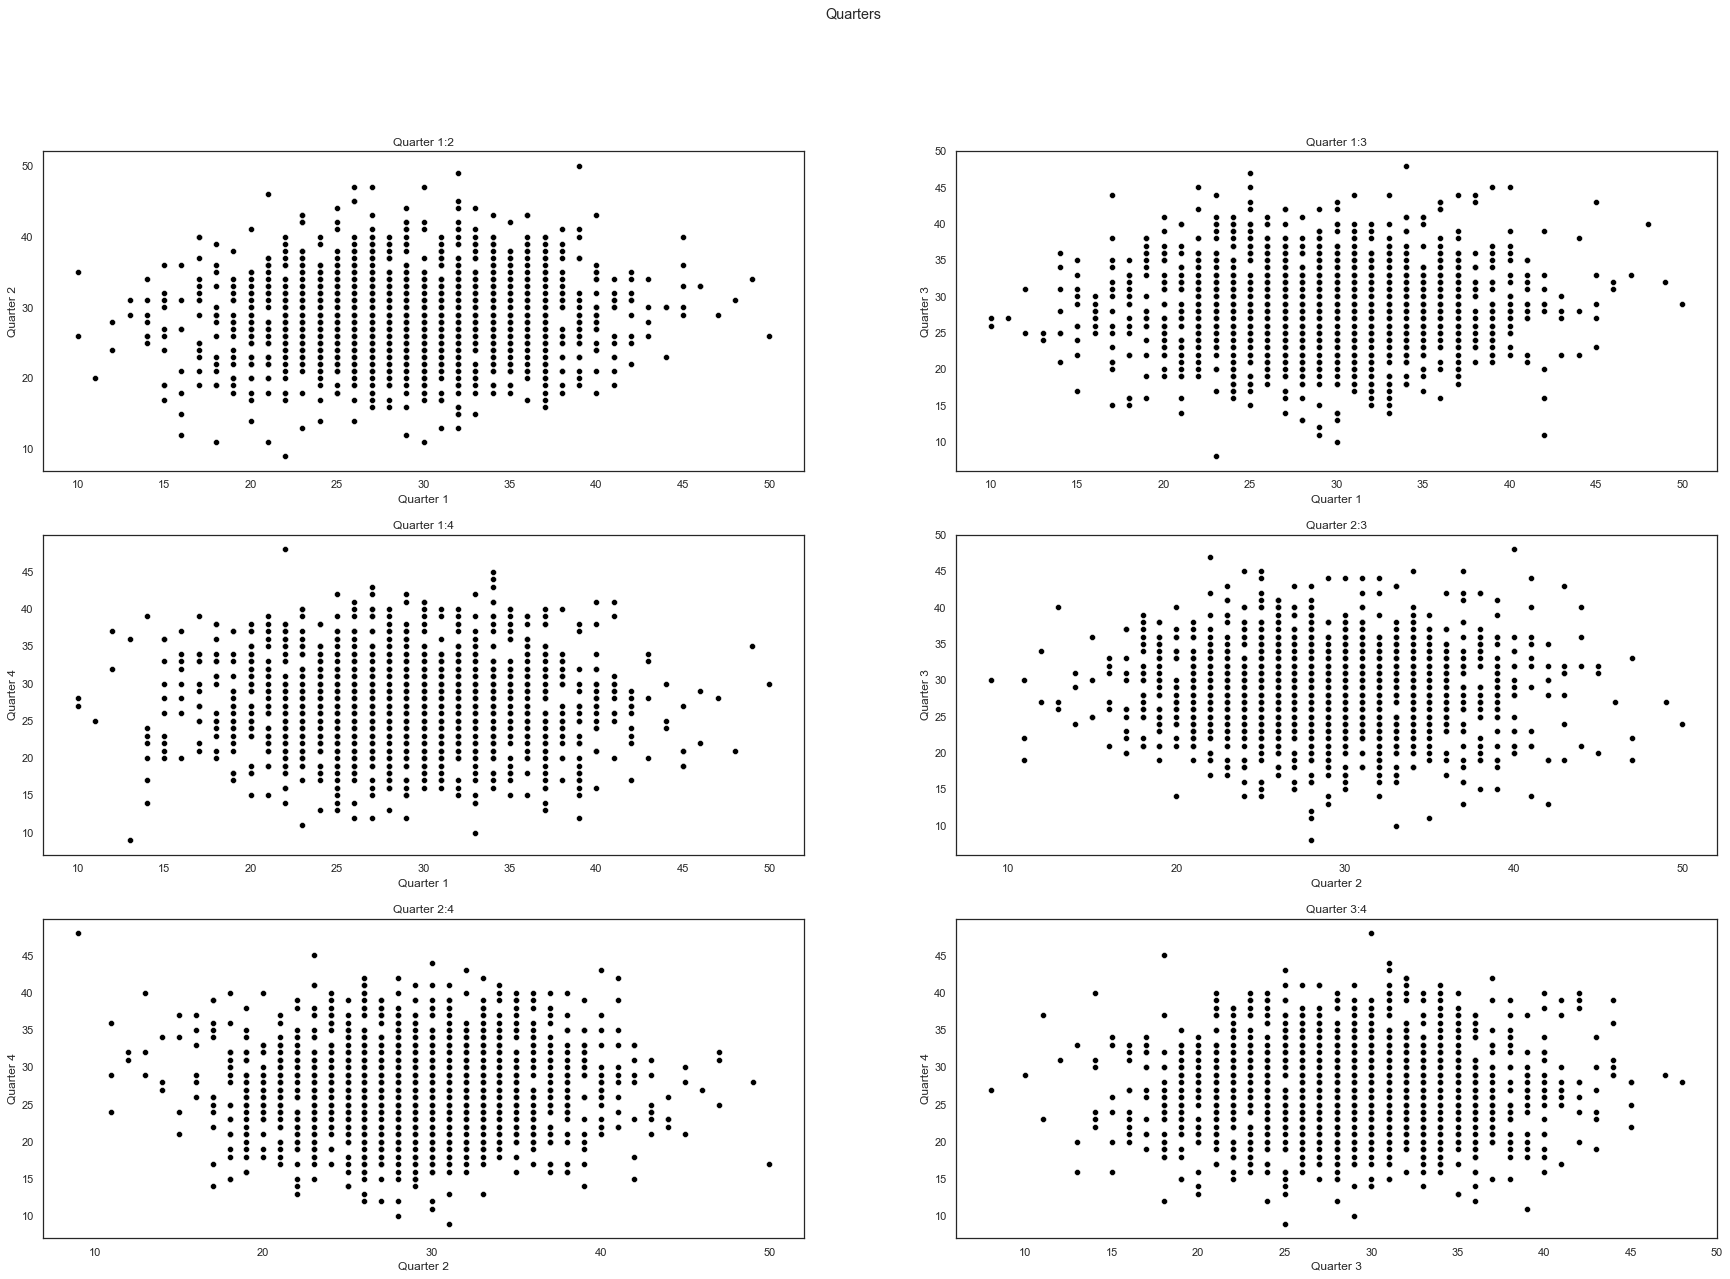

In [13]:
sns.set_theme(style="white", palette="pastel")
fig, axs = plt.subplots(3,2, figsize = (30,20))
fig.suptitle('Quarters')

axs[0,0].set_title('Quarter 1:2')
ax = sns.scatterplot(data=dfHome, x='Quarter 1', y='Quarter 2', ax = axs[0,0], color = 'black')

axs[0,1].set_title('Quarter 1:3')
ax = sns.scatterplot(data=dfHome, x='Quarter 1', y='Quarter 3', ax = axs[0,1], color = 'black')

axs[1,0].set_title('Quarter 1:4')
ax = sns.scatterplot(data=dfHome, x='Quarter 1', y='Quarter 4', ax = axs[1,0], color = 'black')

axs[1,1].set_title('Quarter 2:3')
ax = sns.scatterplot(data=dfHome, x='Quarter 2', y='Quarter 3', ax = axs[1,1], color = 'black')

axs[2,0].set_title('Quarter 2:4')
ax = sns.scatterplot(data=dfHome, x='Quarter 2', y='Quarter 4', ax = axs[2,0], color = 'black')

axs[2,1].set_title('Quarter 3:4')
ax = sns.scatterplot(data=dfHome, x='Quarter 3', y='Quarter 4', ax = axs[2,1], color = 'black')

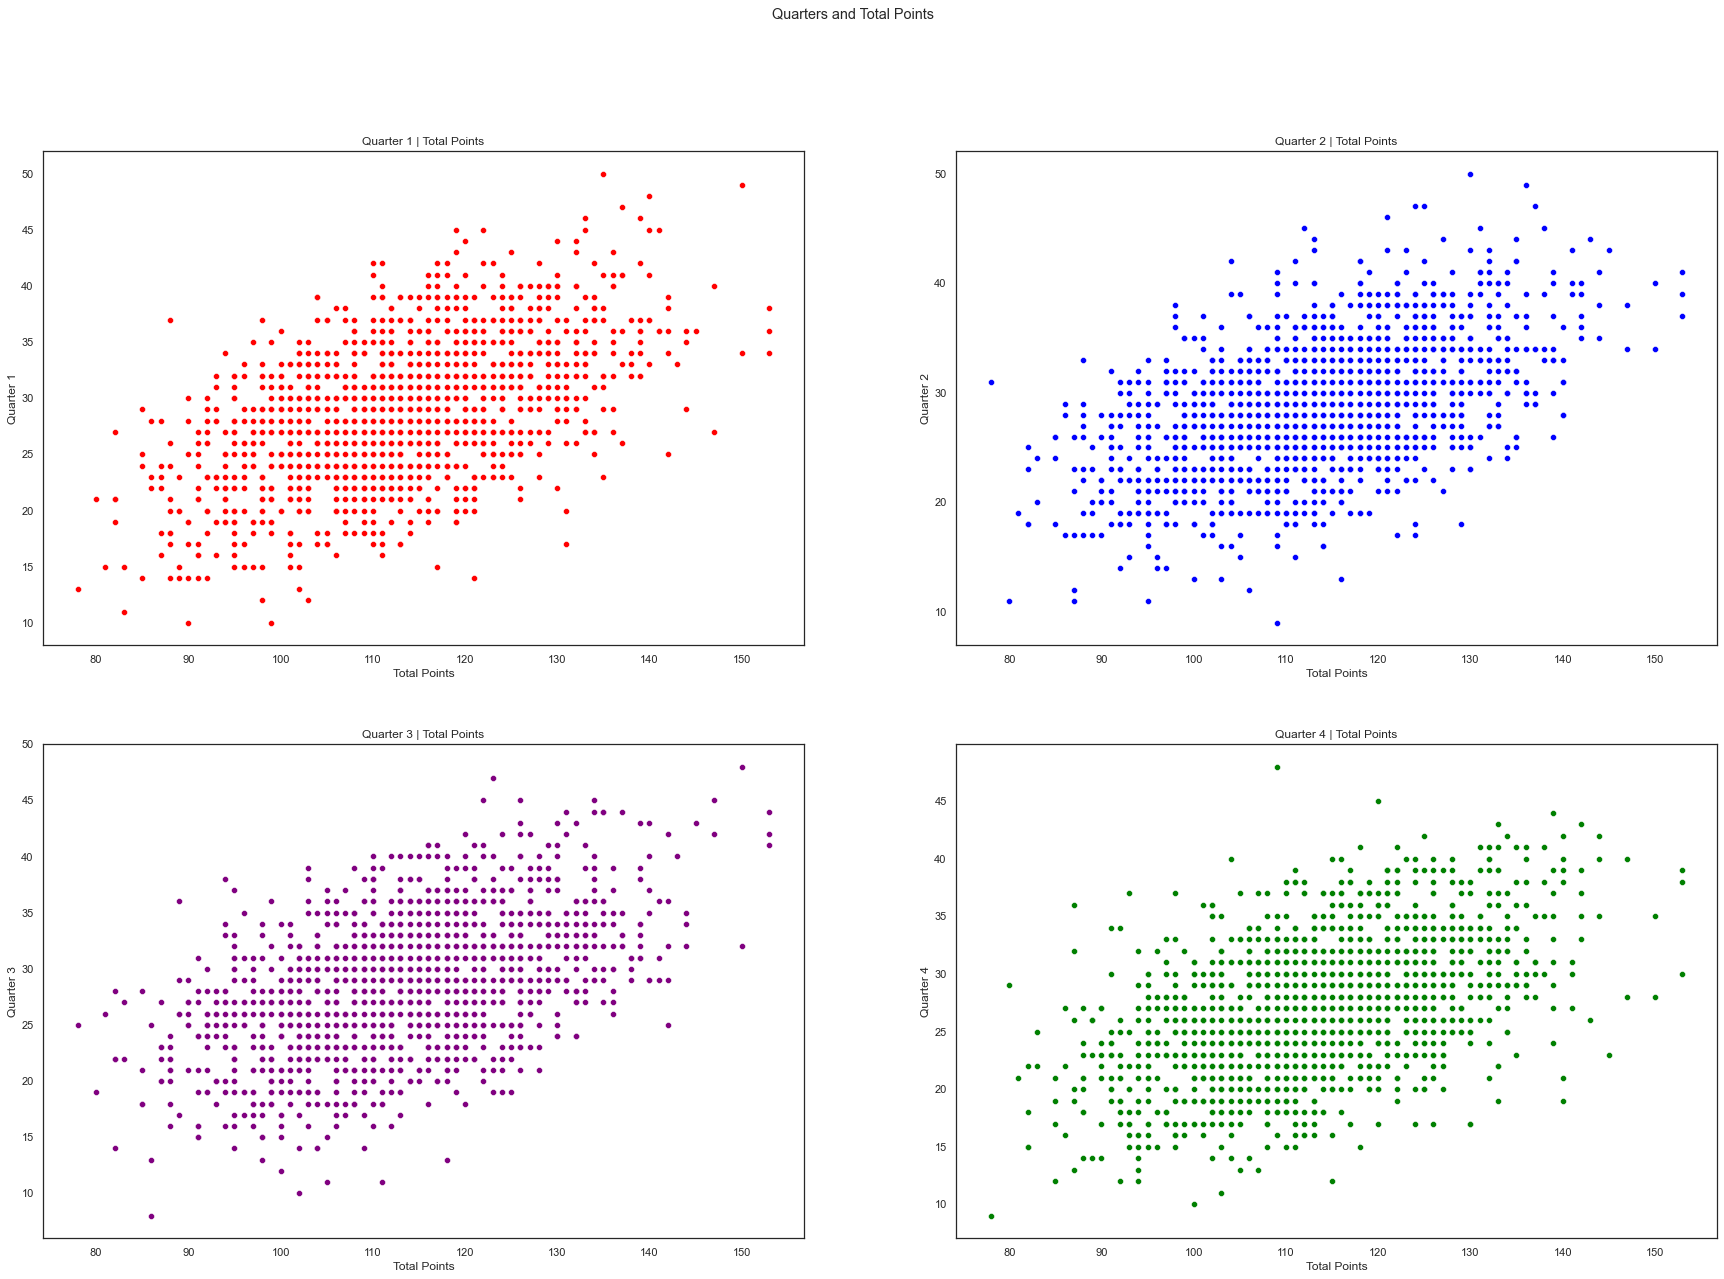

In [14]:
fig, axs = plt.subplots(2, 2, figsize = (30,20))
fig.suptitle('Quarters and Total Points')

axs[0,0].set_title('Quarter 1 | Total Points')
ax = sns.scatterplot(data=dfHome, x='Total Points', y='Quarter 1', ax = axs[0,0], color = 'red')

axs[0,1].set_title('Quarter 2 | Total Points')
ax = sns.scatterplot(data=dfHome, x='Total Points', y='Quarter 2', ax = axs[0,1], color = 'blue')

axs[1,0].set_title('Quarter 3 | Total Points')
ax = sns.scatterplot(data=dfHome, x='Total Points', y='Quarter 3', ax = axs[1,0], color = 'purple')

axs[1,1].set_title('Quarter 4 | Total Points')
ax = sns.scatterplot(data=dfHome, x='Total Points', y='Quarter 4', ax = axs[1,1], color = 'green')

In [15]:
qrtrs.corr().style.background_gradient(cmap='Blues')

,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Total Points
Quarter 1,1.000000,0.080258,0.019628,-0.011512,0.539741
Quarter 2,0.080258,1.000000,-0.016766,-0.005615,0.513945
Quarter 3,0.019628,-0.016766,1.000000,0.038631,0.504424
Quarter 4,-0.011512,-0.005615,0.038631,1.000000,0.493411
Total Points,0.539741,0.513945,0.504424,0.493411,1.000000


Q1 has highest correlation, this correlation consistently drops every quarter, possible reasons:
 1. Less points are scored every quarter
 2. The earlier quarters are a greater indication of total game points.
 3. This difference in correlation (~5% from Q1 to Q4) is not significant

## 1. Check point distributions for each quarter

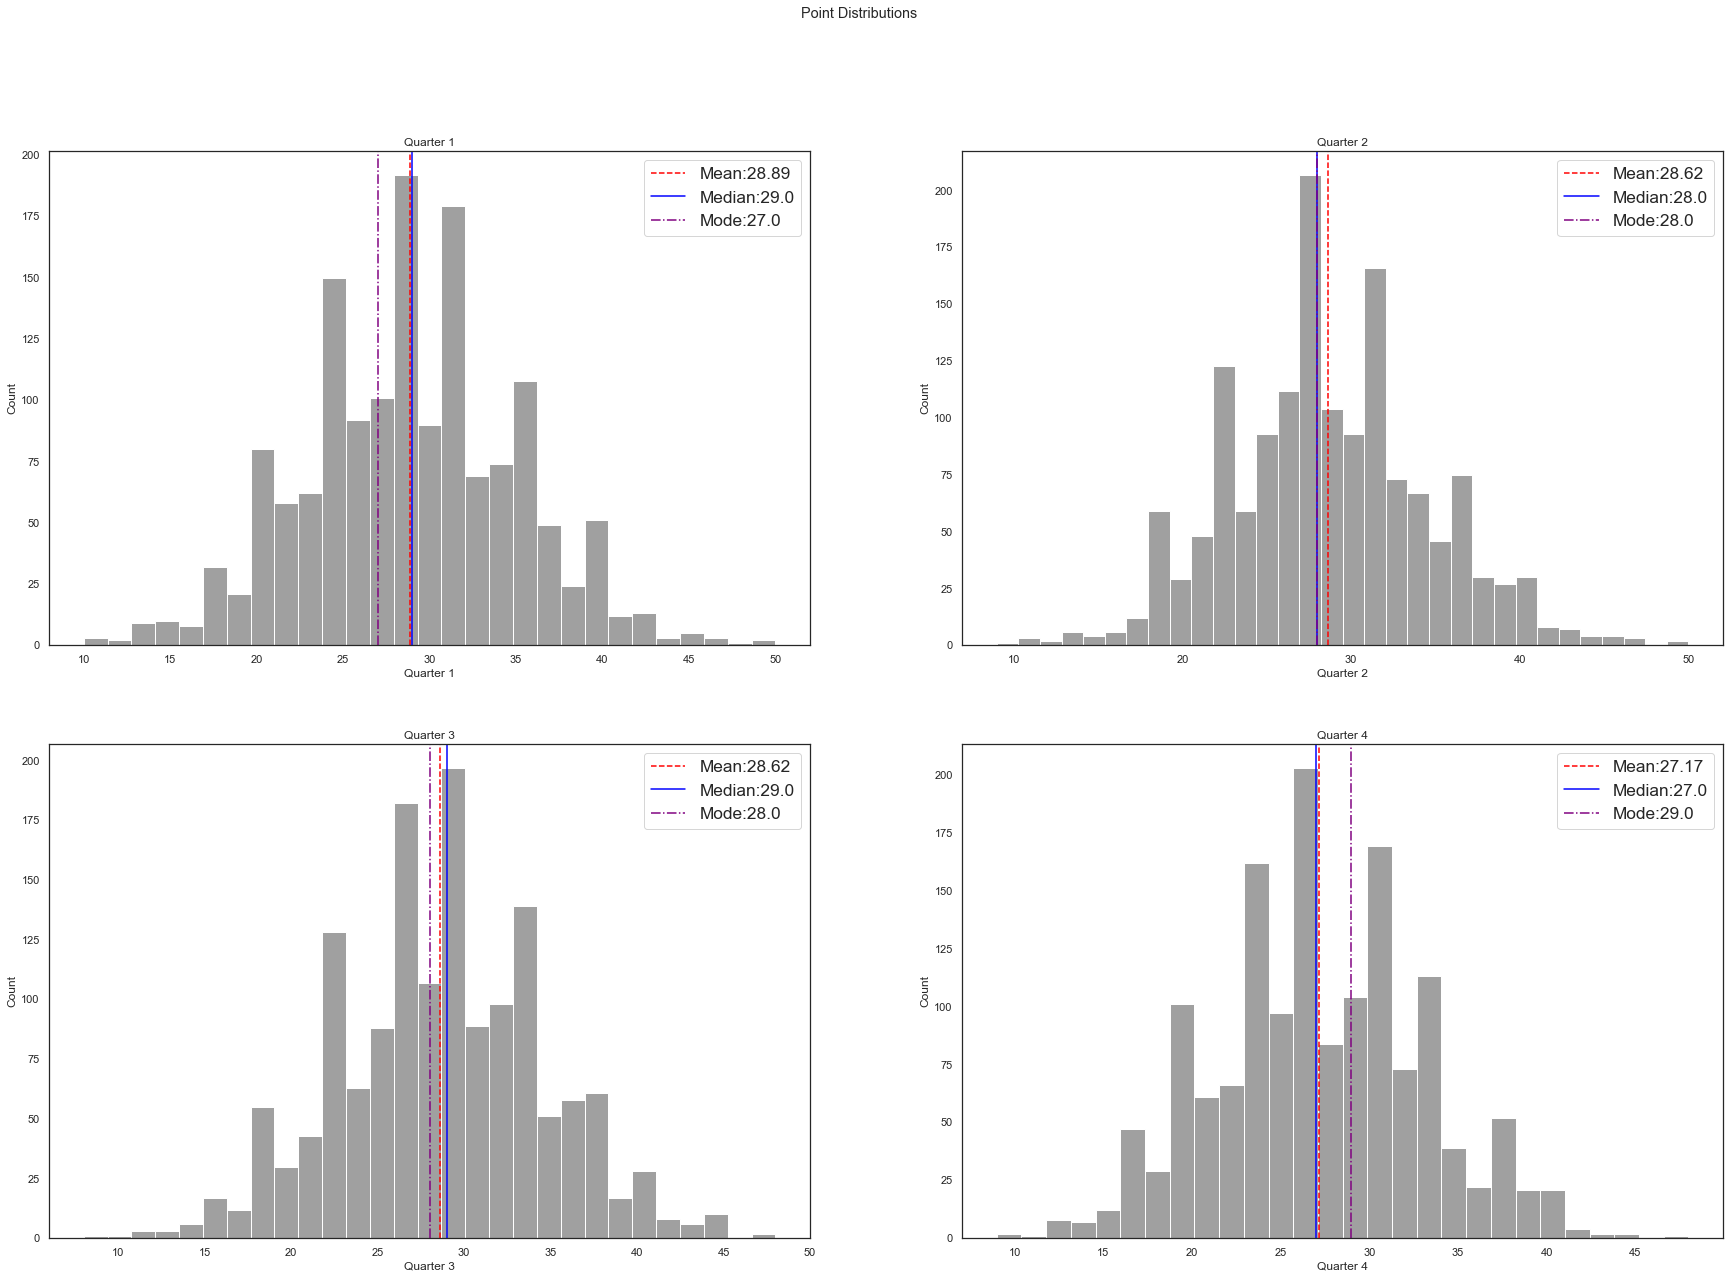

In [16]:
sns.set_theme(style="white", palette="bright")
fig, axs = plt.subplots(2,2, figsize = (30,20))
fig.suptitle('Point Distributions')

axs[0,0].set_title('Quarter 1')
axs[0,0].axvline(x=dfHome['Quarter 1'].mean(), color='red', linestyle = '--', label = f'Mean:{round(dfHome["Quarter 1"].mean(), 2)}')
axs[0,0].axvline(x=dfHome['Quarter 1'].median(), color='blue', label = f'Median:{round(dfHome["Quarter 1"].median(), 2)}')
axs[0,0].axvline(x=dfHome['Quarter 1'].mode()[0], color='purple', linestyle = '-.', label = f'Mode:{round(dfHome["Quarter 1"].mode()[0], 2)}')
axs[0,0].legend(fontsize = 'x-large')
ax = sns.histplot(dfHome['Quarter 1'], ax = axs[0,0], color = 'grey')


axs[0,1].set_title('Quarter 2')
axs[0,1].axvline(x=dfHome['Quarter 2'].mean(), color='red', linestyle = '--', label = f'Mean:{round(dfHome["Quarter 2"].mean(), 2)}')
axs[0,1].axvline(x=dfHome['Quarter 2'].median(), color='blue', label = f'Median:{dfHome["Quarter 2"].median()}')
axs[0,1].axvline(x=dfHome['Quarter 2'].mode()[0], color='purple', linestyle = '-.', label = f'Mode:{dfHome["Quarter 2"].mode()[0]}')
axs[0,1].legend(fontsize = 'x-large')
ax = sns.histplot(dfHome['Quarter 2'], ax = axs[0,1], color = 'grey')

axs[1,0].set_title('Quarter 3')
axs[1,0].axvline(x=dfHome['Quarter 3'].mean(), color='red', linestyle = '--', label = f'Mean:{round(dfHome["Quarter 3"].mean(), 2)}')
axs[1,0].axvline(x=dfHome['Quarter 3'].median(), color='blue', label = f'Median:{dfHome["Quarter 3"].median()}')
axs[1,0].axvline(x=dfHome['Quarter 3'].mode()[0], color='purple', linestyle = '-.', label = f'Mode:{dfHome["Quarter 3"].mode()[0]}')
axs[1,0].legend(fontsize = 'x-large')
ax = sns.histplot(dfHome['Quarter 3'], ax = axs[1,0], color = 'grey')

axs[1,1].set_title('Quarter 4')
axs[1,1].axvline(x=dfHome['Quarter 4'].mean(), color='red', linestyle = '--', label = f'Mean:{round(dfHome["Quarter 4"].mean(), 2)}')
axs[1,1].axvline(x=dfHome['Quarter 4'].median(), color='blue', label = f'Median:{dfHome["Quarter 4"].median()}')
axs[1,1].axvline(x=dfHome['Quarter 4'].mode()[0], color='purple', linestyle = '-.', label = f'Mode:{dfHome["Quarter 4"].mode()[0]}')
axs[1,1].legend(fontsize = 'x-large')
ax = sns.histplot(dfHome['Quarter 4'], ax = axs[1,1], color = 'grey')

### Box Plots

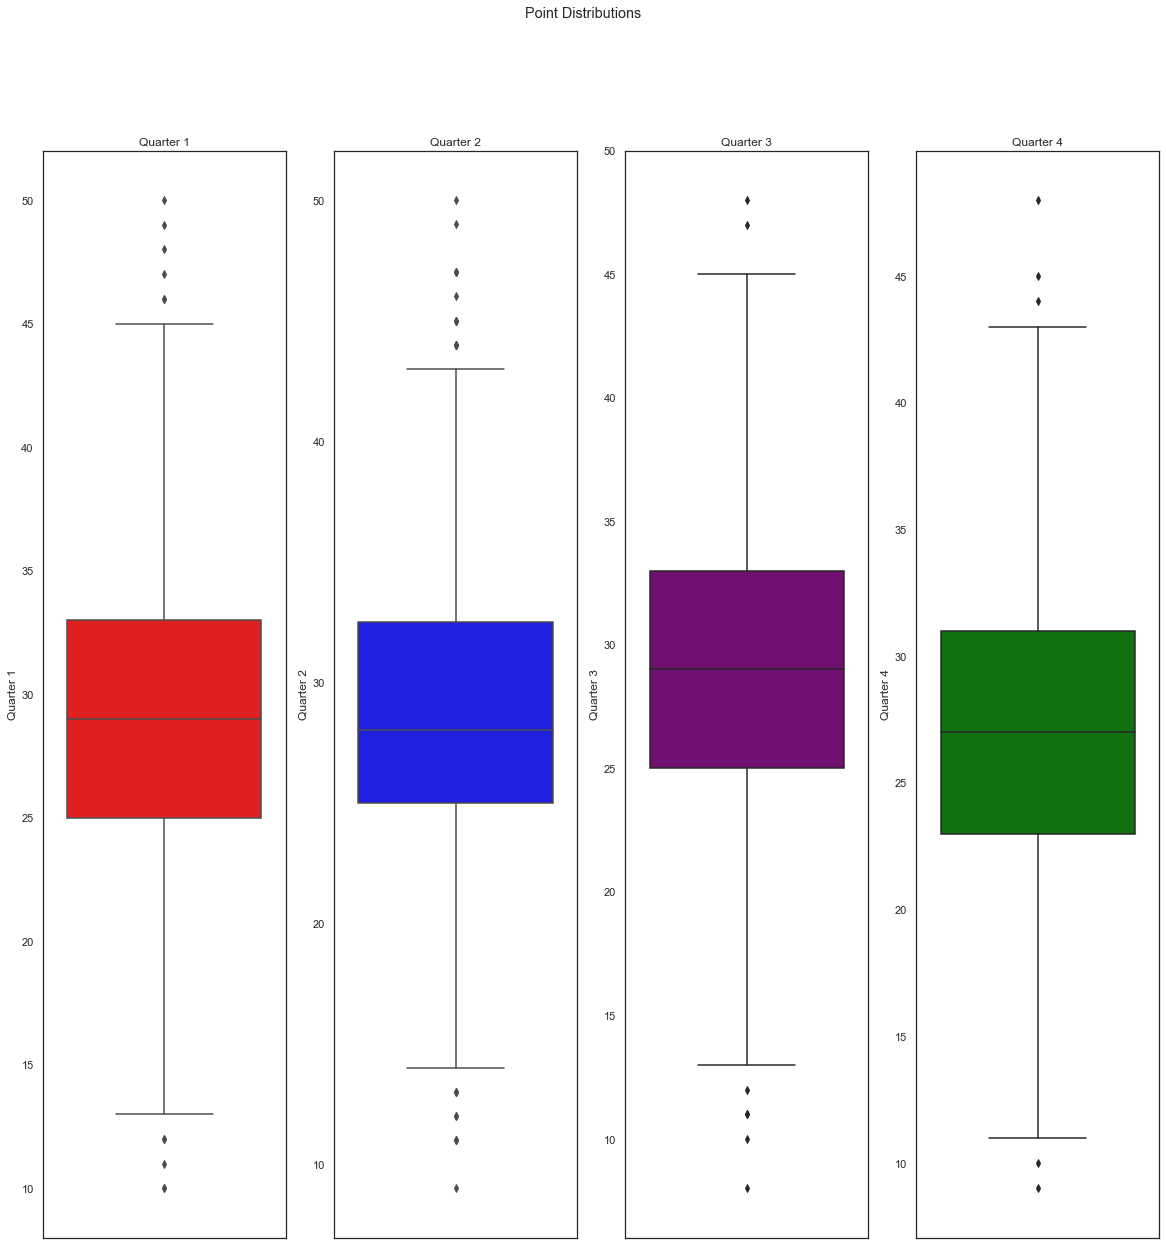

In [17]:
fig, axs = plt.subplots(1,4, figsize = (20,20))
fig.suptitle('Point Distributions')

axs[0].set_title('Quarter 1')
ax = sns.boxplot(y = dfHome['Quarter 1'], ax = axs[0], color = 'red')
axs[1].set_title('Quarter 2')
ax = sns.boxplot(y = dfHome['Quarter 2'], ax = axs[1], color = 'blue')
axs[2].set_title('Quarter 3')
ax = sns.boxplot(y = dfHome['Quarter 3'], ax = axs[2], color = 'purple')
axs[3].set_title('Quarter 4')
ax = sns.boxplot(y = dfHome['Quarter 4'], ax = axs[3], color = 'green')

### Violin Plots

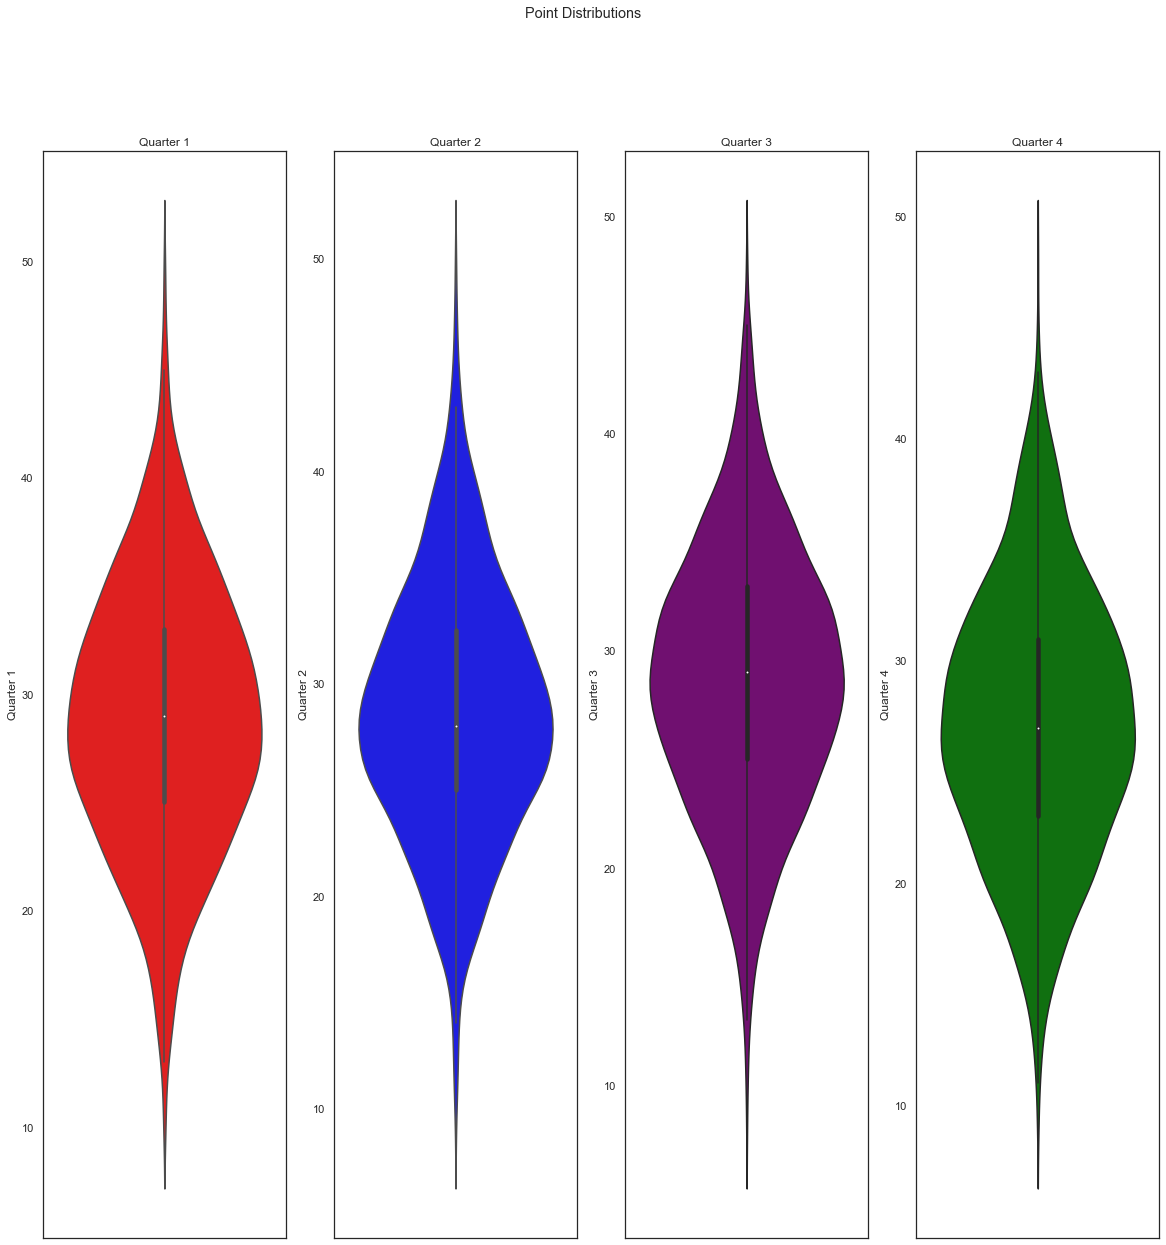

In [18]:
fig, axs = plt.subplots(1,4, figsize = (20,20))
fig.suptitle('Point Distributions')

axs[0].set_title('Quarter 1')
ax = sns.violinplot(y = dfHome['Quarter 1'], ax = axs[0], color = 'red')
axs[1].set_title('Quarter 2')
ax = sns.violinplot(y = dfHome['Quarter 2'], ax = axs[1], color = 'blue')
axs[2].set_title('Quarter 3')
ax = sns.violinplot(y = dfHome['Quarter 3'], ax = axs[2], color = 'purple')
axs[3].set_title('Quarter 4')
ax = sns.violinplot(y = dfHome['Quarter 4'], ax = axs[3], color = 'green')

## 2. Run a linear regression model for each quarter and the total points scored.

### Confirm the obvious - 
#### Run a multi-variable linear regression model using the points from the 4 quarters and the total points scored

In [19]:
q1 = np.array(dfHome['Quarter 1'])
q2 = np.array(dfHome['Quarter 2'])
q3 = np.array(dfHome['Quarter 3'])
q4 = np.array(dfHome['Quarter 4'])

x = np.stack((q1, q2, q3, q4), axis=1)
y = np.array(dfHome['Total Points'])
model = LinearRegression().fit(x, y)

print(f"coefficient of determination: {model.score(x, y)}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 1.0
intercept: 0.0
slope: [1. 1. 1. 1.]


### Quarter 1

coefficient of determination -  Run 1: 0.253  |  Run 2: 0.242
intercept - Run 1: 82  |  Run 2:81
slope - Run 1: 1.1  |  Run 2: 1.1


Text(0, 0.5, 'Total Points Scored')

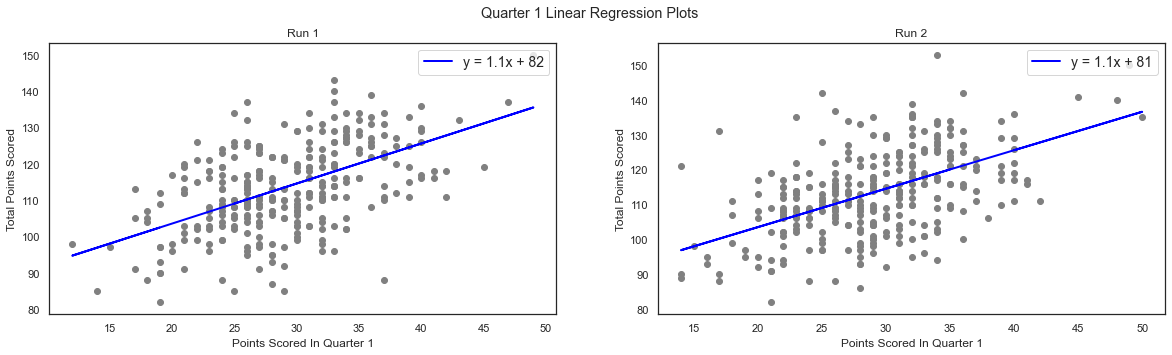

In [20]:
x = q1.reshape((-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
clf = LinearRegression().fit(x_train, y_train)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size =0.2)
clf2 = LinearRegression().fit(x_train2, y_train2)

print(f"coefficient of determination -  Run 1: {round(clf.score(x_test, y_test), 3)}  |  Run 2: {round(clf2.score(x_test2, y_test2), 3)}")
print(f"intercept - Run 1: {round(clf.intercept_)}  |  Run 2:{round(clf2.intercept_)}")
print(f"slope - Run 1: {round(clf.coef_[0], 2)}  |  Run 2: {round(clf2.coef_[0], 2)}")

pred = clf.predict(x_test)
pred2 = clf2.predict(x_test2)


fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Quarter 1 Linear Regression Plots')

axs[0].set_title('Run 1')
axs[0].scatter(x_test, y_test, color="grey")
axs[0].plot(x_test, pred, color="blue", linewidth=2, label=f'y = {round(clf.coef_[0], 2)}x + {round(clf.intercept_)}')

axs[0].legend(fontsize=14, loc = 'upper right')
axs[0].set_xlabel('Points Scored In Quarter 1')
axs[0].set_ylabel('Total Points Scored')


axs[1].set_title('Run 2')
axs[1].scatter(x_test2, y_test2, color="grey")
axs[1].plot(x_test2, pred2, color="blue", linewidth=2, label=f'y = {round(clf2.coef_[0], 2)}x + {round(clf2.intercept_)}')

axs[1].legend(fontsize=14, loc = 'upper right')
axs[1].set_xlabel('Points Scored In Quarter 1')
axs[1].set_ylabel('Total Points Scored')

### Quarter 2

coefficient of determination -  Run 1: 0.178  |  Run 2: 0.221
intercept - Run 1: 82  |  Run 2: 82
slope - Run 1: 1.09  |  Run 2: 1.08


Text(0, 0.5, 'Total Points Scored')

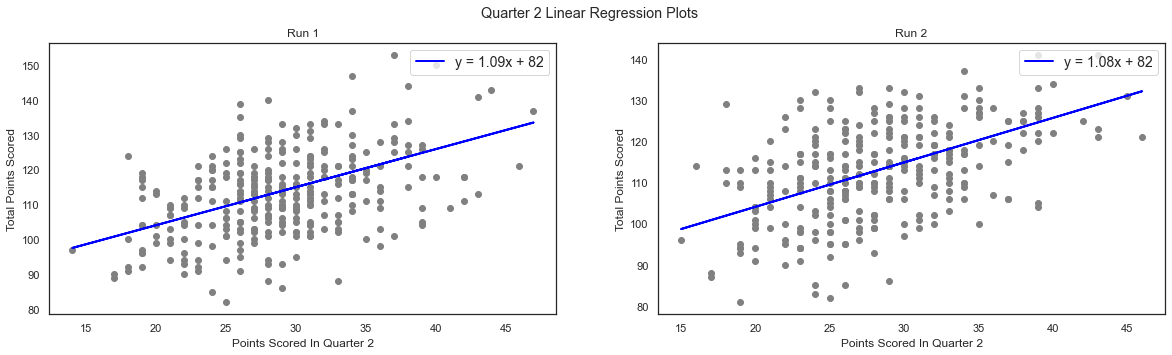

In [21]:
x = q2.reshape((-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
clf = LinearRegression().fit(x_train, y_train)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size =0.2)
clf2 = LinearRegression().fit(x_train2, y_train2)

print(f"coefficient of determination -  Run 1: {round(clf.score(x_test, y_test), 3)}  |  Run 2: {round(clf2.score(x_test2, y_test2), 3)}")
print(f"intercept - Run 1: {round(clf.intercept_)}  |  Run 2: {round(clf2.intercept_)}")
print(f"slope - Run 1: {round(clf.coef_[0], 2)}  |  Run 2: {round(clf2.coef_[0], 2)}")

pred = clf.predict(x_test)
pred2 = clf2.predict(x_test2)


fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Quarter 2 Linear Regression Plots')

axs[0].set_title('Run 1')
axs[0].scatter(x_test, y_test, color="grey")
axs[0].plot(x_test, pred, color="blue", linewidth=2, label=f'y = {round(clf.coef_[0], 2)}x + {round(clf.intercept_)}')

axs[0].legend(fontsize=14, loc = 'upper right')
axs[0].set_xlabel('Points Scored In Quarter 2')
axs[0].set_ylabel('Total Points Scored')


axs[1].set_title('Run 2')
axs[1].scatter(x_test2, y_test2, color="grey")
axs[1].plot(x_test2, pred2, color="blue", linewidth=2, label=f'y = {round(clf2.coef_[0], 2)}x + {round(clf2.intercept_)}')

axs[1].legend(fontsize=14, loc = 'upper right')
axs[1].set_xlabel('Points Scored In Quarter 2')
axs[1].set_ylabel('Total Points Scored')

### Quarter 3

coefficient of determination -  Run 1: 0.271  |  Run 2: 0.264
intercept - Run 1: 84  |  Run 2:83
slope - Run 1: 1.03  |  Run 2: 1.06


Text(0, 0.5, 'Total Points Scored')

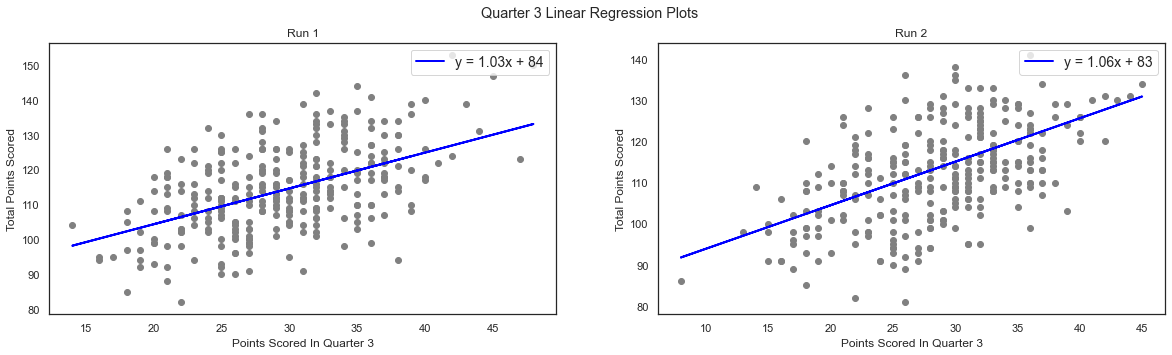

In [22]:
x = q3.reshape((-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
clf = LinearRegression().fit(x_train, y_train)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size =0.2)
clf2 = LinearRegression().fit(x_train2, y_train2)

print(f"coefficient of determination -  Run 1: {round(clf.score(x_test, y_test), 3)}  |  Run 2: {round(clf2.score(x_test2, y_test2), 3)}")
print(f"intercept - Run 1: {round(clf.intercept_)}  |  Run 2:{round(clf2.intercept_)}")
print(f"slope - Run 1: {round(clf.coef_[0], 2)}  |  Run 2: {round(clf2.coef_[0], 2)}")

pred = clf.predict(x_test)
pred2 = clf2.predict(x_test2)


fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Quarter 3 Linear Regression Plots')

axs[0].set_title('Run 1')
axs[0].scatter(x_test, y_test, color="grey")
axs[0].plot(x_test, pred, color="blue", linewidth=2, label=f'y = {round(clf.coef_[0], 2)}x + {round(clf.intercept_)}')

axs[0].legend(fontsize=14, loc = 'upper right')
axs[0].set_xlabel('Points Scored In Quarter 3')
axs[0].set_ylabel('Total Points Scored')


axs[1].set_title('Run 2')
axs[1].scatter(x_test2, y_test2, color="grey")
axs[1].plot(x_test2, pred2, color="blue", linewidth=2, label=f'y = {round(clf2.coef_[0], 2)}x + {round(clf2.intercept_)}')

axs[1].legend(fontsize=14, loc = 'upper right')
axs[1].set_xlabel('Points Scored In Quarter 3')
axs[1].set_ylabel('Total Points Scored')

### Quarter 4

coefficient of determination -  Run 1: 0.23  |  Run 2: 0.256
intercept - Run 1: 85  |  Run 2:86
slope - Run 1: 1.04  |  Run 2: 1.02


Text(0, 0.5, 'Total Points Scored')

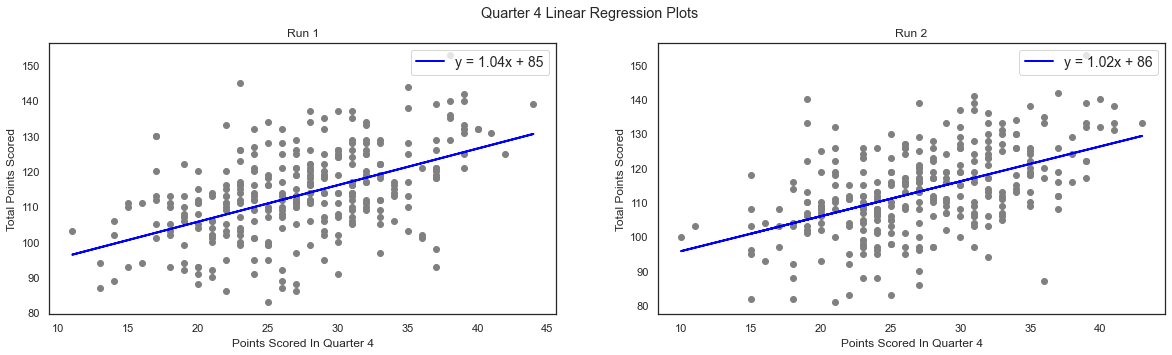

In [23]:
x = q4.reshape((-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
clf = LinearRegression().fit(x_train, y_train)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size =0.2)
clf2 = LinearRegression().fit(x_train2, y_train2)

print(f"coefficient of determination -  Run 1: {round(clf.score(x_test, y_test), 3)}  |  Run 2: {round(clf2.score(x_test2, y_test2), 3)}")
print(f"intercept - Run 1: {round(clf.intercept_)}  |  Run 2:{round(clf2.intercept_)}")
print(f"slope - Run 1: {round(clf.coef_[0], 2)}  |  Run 2: {round(clf2.coef_[0], 2)}")

pred = clf.predict(x_test)
pred2 = clf2.predict(x_test2)


fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Quarter 4 Linear Regression Plots')

axs[0].set_title('Run 1')
axs[0].scatter(x_test, y_test, color="grey")
axs[0].plot(x_test, pred, color="blue", linewidth=2, label=f'y = {round(clf.coef_[0], 2)}x + {round(clf.intercept_)}')

axs[0].legend(fontsize=14, loc = 'upper right')
axs[0].set_xlabel('Points Scored In Quarter 4')
axs[0].set_ylabel('Total Points Scored')


axs[1].set_title('Run 2')
axs[1].scatter(x_test2, y_test2, color="grey")
axs[1].plot(x_test2, pred2, color="blue", linewidth=2, label=f'y = {round(clf2.coef_[0], 2)}x + {round(clf2.intercept_)}')

axs[1].legend(fontsize=14, loc = 'upper right')
axs[1].set_xlabel('Points Scored In Quarter 4')
axs[1].set_ylabel('Total Points Scored')

---
#### Findings:
* The collection of points from the 4 quarters is entirely responsible for the Total Points
* There is no sign of correlation between quarters 
* From Heatmap / Pearson Coefficient we can see that each quarter has a ~54-50% chance of being correlated to the Total Points
    - Correlation decreases with each progressive quarter
* The Coefficient of Determination $r^2$ has wide fluctuations (within a quarter)
    - Typically fluctuates between .19 and .30
    - No clear patterns are present regarding $r^2$
* With an intercept consistently hovering around 83 we can predict that in 3 quarters ~83 points will be scored
    - Intercept tends to increase with each progressive quarter
* The slope consistently stays above 1.0
    - Between 1.00 and 1.10
    - Earlier quarters typically have a higher slope

---
Aside from Q4, despite earlier quarters having consistently higher slopes and lower intercepts, the measures of center and value distribution between the quarters is relatively even.
Some possible explanations for this are:
* This pattern does not actually exist
* More points are scored in earlier quarters, and the current visualizations do not properly represent this
* The tone set by the earlier quarters is indicative of how the rest of the game will play out
* The data from blow-out games where the losing team gives up mid-game is affecting the data